# Change in Planetary Albedo from Cloud Cover

Here, we plot planetary albedo against cloud cover to infer how aerosol forcing is distirbuted over direct and semi-direct effects.

## Import Libraries

In [1]:
%matplotlib inline

import sys, os
import numpy as np
import datetime, importlib
import scipy.ndimage

import pylab as plt
plt.rcParams['figure.figsize'] = (12, 8)

import seaborn as sns
sns.set_context( 'talk' )

import xarray as xr

import nawdex_analysis.io.tools

/pf/b/b380352/.conda/python37/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [3]:
tools_dir = '%s/proj/2017-11_icon-de-lem-analysis/tools' % os.environ['HOME']

import sys
sys.path.append(tools_dir)
import input_regrid5km
importlib.reload( input_regrid5km )

<module 'input_regrid5km' from '/pf/b/b380352/proj/2017-11_icon-de-lem-analysis/tools/input_regrid5km.py'>

## Open Aggregate Data

In [4]:
fname  = '/pf/b/b380352/data/icon-lem/aggregates/domain_average_resampled5min.nc'
dave = xr.open_dataset( fname )


## Prepare Data  

In [5]:
dave['sou_t'] = dave['sob_t'] - dave['sod_t']
dave['albedo'] = - 100. * dave['sou_t'] / dave['sod_t']

In [6]:
dave = input_regrid5km.get_difference( dave )

In [7]:
dom = 'DOM01'
dave1 = dave.sel( dom = dom, mode = 'scattering', time = slice('20130502T08', '20130502T14') )
dave1a = dave.sel( dom = dom, mode = 'absorbing', time = slice('20130502T08', '20130502T14') )

ddave1 = dave.sel( dom = dom, mode = 'difference', time = slice('20130502T08', '20130502T14') )

dave1 = dave1.resample(time='15min').nearest()
dave1a = dave1a.resample(time='15min').nearest()

ddave1 = ddave1.resample(time='15min').nearest()


## Plotting

[  1.23472706 -64.44721298]


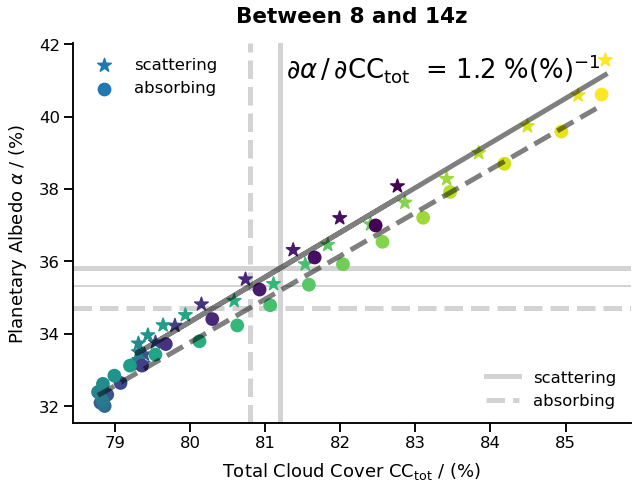

In [8]:
hlinecol = 'lightgray'
fitcol = 'k'

fig = plt.figure( figsize = (10,7))
ax = plt.subplot(111)
#ax.scatter(dave1['albedo'], np.sqrt(  dave1['clcm'] * dave1['clcl'] ), c = dave1.time, marker = 'o')

y, x = dave1['albedo'].data,  dave1['clt'].data
ax.scatter(x, y, c = dave1.time, marker = '*', s = 200, label = 'scattering')
#ax2.scatter(dave1['albedo'], dave1['clcl'], c = dave1.time, marker = 'v')

p = np.polyfit( x,y, 1)
yfit = np.polyval( p, x )
ax.plot(x, yfit, '-', lw = 5, c = fitcol ,alpha = 0.5)
print( p) 
y, x = dave1a['albedo'].data,  dave1a['clt'].data
ax.scatter(x, y, c = dave1.time, marker = 'o', s = 150, label = 'absorbing')
#ax2.scatter(dave1['albedo'], dave1['clcl'], c = dave1.time, marker = 'v')


p = np.polyfit( x,y, 1)
x0 = [x.min(), x.max()]
yfit = np.polyval( p, x0 )
ax.plot(x0, yfit, ls = '--', lw = 5, c = fitcol, alpha = 0.5)

plt.figtext(0.64, 0.81,  
            r'$\partial \alpha\,/\, \partial \mathrm{CC_{tot}}$  = %.1f %s(%s)${}^{-1}$' % ( p[0], '%', '%' ), 
            ha = 'center', fontsize = 'x-large' )
plt.xlabel( 'Total Cloud Cover $\mathrm{CC_{tot}}$ / (%)', labelpad = 10)
plt.ylabel( r'Planetary Albedo $\alpha$ / (%)', labelpad = 10)

plt.title( 'Between 8 and 14z', fontsize = 'large', fontweight = 'bold', pad = 20)

plt.axvline( dave1['clt'].mean(), lw = 5, c = hlinecol, zorder = 0)
plt.axvline( dave1a['clt'].mean(), lw = 5, c = hlinecol, ls = '--', zorder = 0 )

plt.axhline( dave1['albedo'].mean() - 0.4*1.2, lw = 2, c = hlinecol, zorder = 0 )
plt.axhline( dave1['albedo'].mean(), lw = 5, c = hlinecol, zorder = 0 , label = 'scattering')

plt.axhline( dave1a['albedo'].mean(), lw = 5, c = hlinecol, ls = '--', zorder = 0, label = 'absorbing' )


handles, labels = ax.get_legend_handles_labels()

first_legend =plt.legend(handles[:2], labels[:2],   loc = 'lower right', frameon = False)

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

plt.legend(handles[-2:], labels[-2:], loc = 'upper left', frameon = False)


sns.despine()

plt.savefig('../pics/direct-vs-indirect.png', dpi = 300.)
